<div style="color:red">
    <h3>To-do:</h3>
    <ul>
        <li>Finish descriptions</li>
    </ul>
</div> 

## Trend basics


### Table of Contents

* [1. Basic concepts of trend](#1.-Basic-concepts-of-trend)
* [2. Drawing trendlines](#2.-Drawing-trendlines)
* [3. Trend detection](#3.-Trend-detection)

<hr size="5"/>

### 1. Basic concepts of trend

<p style="color: red">TO-DO</p>

Uptrend, downtrend, sideways trend

### 2. Drawing trendlines

In [190]:
# import libraries
import pandas as pd
import quandl as qdl
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [191]:
# load data
df = pd.read_csv('../../database/nasdaq_ticks_day/nasdaq_AAPL.csv', header=0, index_col='Date', parse_dates=True)
df = df.loc[pd.Timestamp('2009-01-01'):pd.Timestamp('2019-01-01')]

df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2009-01-02,10.620870,11.259012,10.531826,11.223147,186503800
2009-01-05,11.522433,11.894682,11.465544,11.696809,295402100
2009-01-06,11.866239,12.017118,11.425970,11.503882,322327600
2009-01-07,11.354242,11.439575,11.162552,11.255305,188262200
2009-01-08,11.183572,11.519957,11.135340,11.464305,168375200


In [192]:
data = df.copy()
data['date_id'] = ((data.index.date - data.index.date.min())).astype('timedelta64[D]')
data['date_id'] = data['date_id'].dt.days + 1 # calculate cumulative number of days

data.head()

,Open,High,Low,Close,Volume,date_id
Date,,,,,,
2009-01-02,10.620870,11.259012,10.531826,11.223147,186503800,1
2009-01-05,11.522433,11.894682,11.465544,11.696809,295402100,4
2009-01-06,11.866239,12.017118,11.425970,11.503882,322327600,5
2009-01-07,11.354242,11.439575,11.162552,11.255305,188262200,6
2009-01-08,11.183572,11.519957,11.135340,11.464305,168375200,7


In [193]:
# high trend line

data1 = data.copy()

while len(data1)>3:

    reg = linregress(x=data1['date_id'], y=data1['High'])
    data1 = data1.loc[data1['High'] > reg[0] * data1['date_id'] + reg[1]]

reg = linregress(x=data1['date_id'], y=data1['High'])

data['High trend'] = reg[0] * data['date_id'] + reg[1]

In [194]:
# low trend line

data2 = data.copy()

while len(data2) > 3:

    reg = linregress(x=data2['date_id'], y=data2['Low'])
    data2 = data2.loc[data2['Low'] < reg[0] * data2['date_id'] + reg[1]]

reg = linregress(x=data2['date_id'], y=data2['Low'])

data['Low trend'] = reg[0] * data['date_id'] + reg[1]

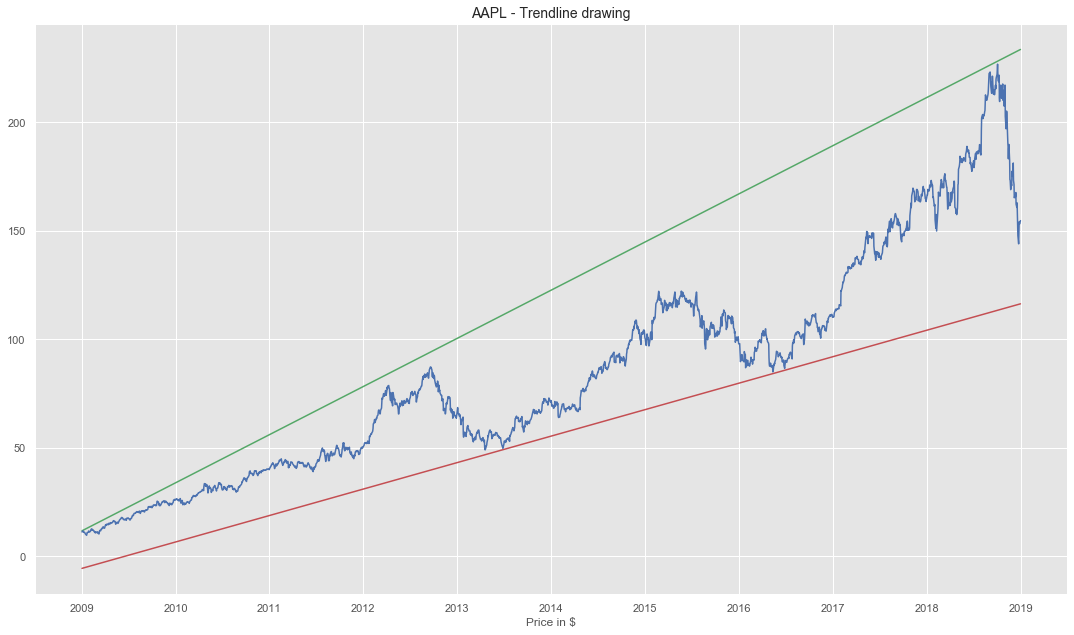

<Figure size 432x288 with 0 Axes>

In [195]:
# plot
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
plt.style.use('ggplot')

plt.plot(data['High trend'], 'g')
plt.plot(data['Low trend'], 'r')
plt.plot(data['Close'], 'b')

plt.xlabel("Date")
plt.xlabel("Price in $")
plt.title('AAPL - Trendline drawing', fontsize=14)
plt.show()
plt.savefig('./figures/01-trendline-drawing.png', dpi=200)

### 3. Trend detection

<p style="color: red">TO-DO</p>


In [196]:
! pip install ruptures

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [197]:
# load data
df = pd.read_csv('../../database/nasdaq_ticks_day/nasdaq_AAPL.csv', header=0, index_col='Date', parse_dates=True)
df = df.loc[pd.Timestamp('2019-01-01'):pd.Timestamp('2019-12-01')]

In [198]:
data = pd.DataFrame(index=df.index).fillna(0.0)
data['Price'] = df['Close']

data.head()

,Price
Date,
2019-01-02,154.794983
2019-01-03,139.376251
2019-01-04,145.326126
2019-01-07,145.002686
2019-01-08,147.766861


In [199]:
# Convert the time series values to a numpy 1D array
points = np.array(data['Price'])

<Figure size 432x288 with 0 Axes>

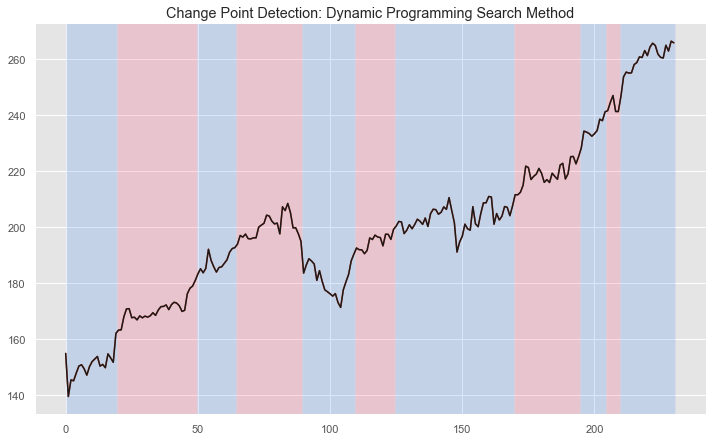

In [222]:
fig = plt.figure()

# RUPTURES PACKAGE 
# https://github.com/deepcharles/ruptures

import ruptures as rpt

# changepoint detection with dynamic programming search method
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points)
my_bkps = algo.predict(n_bkps=10)

rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.plot(points, 'k')
plt.title('Change Point Detection: Dynamic Programming Search Method')
plt.show()

### Reference

* [Ruptures package](https://github.com/deepcharles/ruptures) (Github)